In [1]:
import json
import os
base_dir = os.getcwd()
from PIL import Image
from transformers import ViTFeatureExtractor, ViTForImageClassification

c:\notcdrive\allsoftinstallations\Anaconda\envs\heroda\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
image_path = os.path.join(base_dir, 'test', 'motion.jpg')
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
inputs = feature_extractor(images=Image.open(image_path), return_tensors="pt")

c:\notcdrive\allsoftinstallations\Anaconda\envs\heroda\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [16]:
# qual_id2label = {0: 'defocus_blurred', 1: 'motion_blurred', 2 : 'sharp'}

quality_model_dir = os.path.join(base_dir, 'quality_model')
loaded_quality_model = ViTForImageClassification.from_pretrained(quality_model_dir)

#load id2label from config.json
with open(os.path.join(quality_model_dir, 'config.json')) as f:
    config = json.load(f)
qual_id2label = config['id2label']

# convert keys from string to integer
# current is like this : {'0': 'defocused_blurred', '1': 'motion_blurred', '2': 'sharp'}
# should be like this : {0: 'defocused_blurred', 1: 'motion_blurred', 2: 'sharp'}

json_dict = {int(k):v for k,v in qual_id2label.items()}
json_string = json.dumps(json_dict)


# Make quality prediction
outputs1 = loaded_quality_model(**inputs)
pred1 = outputs1.logits.argmax().item()

######################################################################################################

rotate_model_dir = os.path.join(base_dir, 'rotation_model')
loaded_rotate_model = ViTForImageClassification.from_pretrained(rotate_model_dir)
#load id2label from config.json
with open(os.path.join(rotate_model_dir, 'config.json')) as f:
    config = json.load(f)
rotate_id2label = config['id2label']

json_dict = {int(k):v for k,v in rotate_id2label.items()}
json_string = json.dumps(json_dict)

# Make rotation prediction
outputs2 = loaded_rotate_model(**inputs)
pred2 = outputs2.logits.argmax().item()

######################################################################################################

mode_model_dir = os.path.join(base_dir, 'mode_model')
loaded_mode_model = ViTForImageClassification.from_pretrained(mode_model_dir)
#load id2label from config.json
with open(os.path.join(mode_model_dir, 'config.json')) as f:
    config = json.load(f)
mode_id2label = config['id2label']

json_dict = {int(k):v for k,v in mode_id2label.items()}
json_string = json.dumps(json_dict)

# Make mode prediction
outputs3 = loaded_mode_model(**inputs)
pred3 = outputs3.logits.argmax().item()

######################################################################################################

print(f'Predicted quality: {qual_id2label[str(pred1)]}')
print(f'Predicted rotation: {rotate_id2label[str(pred2)]}')
print(f'Predicted mode: {mode_id2label[str(pred3)]}')

Predicted quality: motion_blurred
Predicted rotation: No_rotation
Predicted mode: RGB


In [24]:
def predict_model(model_dir, inputs, model_type):
    model = ViTForImageClassification.from_pretrained(model_dir)
    outputs = model(**inputs)
    pred = outputs.logits.argmax().item()
    
    if model_type == "quality":
        id2label = {0: 'defocused_blurred', 1: 'motion_blurred', 2: 'sharp'}
    elif model_type == "rotation":
        id2label = {0: '0', 1: '90', 2: '180', 3: '-90'}
    elif model_type == "mode":
        id2label = {0: 'RGB', 1: 'BGR'}
    
    return id2label[pred]


# Make quality prediction
qual_pred = predict_model(os.path.join(base_dir, 'quality_model'), inputs, "quality")
print(f'Predicted quality: {qual_pred}')

# Make rotation prediction
rotate_pred = predict_model(os.path.join(base_dir, 'rotation_model'), inputs, "rotation")
print(f'Predicted rotation: {rotate_pred}')

# Make mode prediction
mode_pred = predict_model(os.path.join(base_dir, 'mode_model'), inputs, "mode")
print(f'Predicted mode: {mode_pred}')


Predicted quality: motion_blurred
Predicted rotation: -90
Predicted mode: BGR


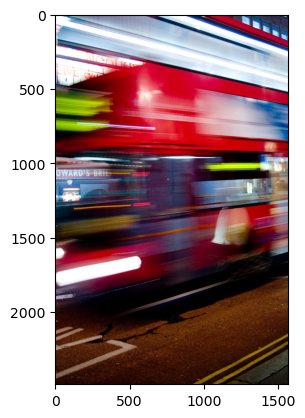

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()